Of course, not all problems can be treated as periodic. We now begin to consider how to construct spectral methods for bounded, non-periodic domains.

Suppose that we wish to work on $[-1,1]$ with non-periodic functions. One approach would be to pretend that the functions were periodic and use trigonometric (i.e., Fourier based) interpolation in equispaced points. It is a method that works fine for problem like the one whose solutions tend to zero exponential fast near the boundaries. In general, however, this approach sacrifices the accuracy advantages of spectral methods. A smooth gunction becomes non-smooth in general when periodically extended.

With a Fourier spectral method, the contamination caused by these discontinuities will be global, destroying the spectral accuracy - the Gibbs phenomenon visible in one of our earlier programs.

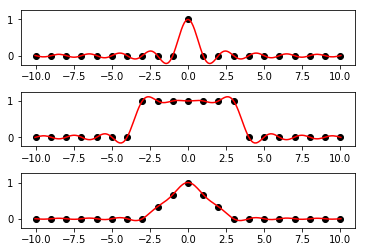

In [2]:
# Band limited interpolation
import scipy as sp;
import matplotlib.pyplot as plt
h=1;
xmax=10;
N=2*xmax//h;
x=sp.linspace(-xmax,xmax,N+1); # computational grid
xx=sp.linspace(-xmax-h/20,xmax+h/20,10*(N+1)); # plotting grid


for i in range(1,4):
    plt.subplot(3,1,i);
    if (i==1):
        v=(x==0);
    if (i==2):
        v=(sp.absolute(x)<=3.0);
    if (i==3):
        v=(sp.maximum(0,1-sp.absolute(x)/3.0));
    plt.plot(x,v,'ko');
    p = sp.zeros(sp.size(xx));
    for j in range (0,sp.size(x)):
        y = (xx-x[j])/h;
        p = p+v[j]*sp.sin(sp.pi*y)/(sp.pi*y);      
    plt.plot(xx,p,'r-');
    plt.axis([-11, 11, -0.25, 1.25]);

plt.rcParams["figure.figsize"] = [16,6]
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5);
plt.show()

The error in the interpolant will be $\mathcal{O}(1)$, the error in the first derivative will be $\mathcal{O}(N)$ and so on. These errors will remain significant if extra steps are taken to make the function under study periodic. To achiever good accuracy by a method of that kind it would be necessary to enforce continuity not just of the function values but also of several derivatives, a process neither elegant nor efficient.

Instead it is customary to replace trigonometric polynomials by algebraic polynomials, i.e., $p(x) = a_0+a_1 x + a_2 x^2 + \cdots + a_N x^N$. The first idea we might have is to use polynomial interpolation in equispaced points. Now this, as it turns out, is **extremely bad** in general. A problem know as the Runge phenomenon is encountered that is more extreme than the Gibbs phenomenon. Let us consider the problem of interpolation using polynomials at $N+1$ grid points.

In [85]:
import scipy as sp;
import numpy as np;
def Lagrange(x,xnodes,k):
    n = sp.size(xnodes);
    l = 1;
    for i in sp.arange(0,k):
        l = l * (x-xnodes[i])/(xnodes[k]-xnodes[i]);
    for i in sp.arange(k+1,n):
        l = l * (x-xnodes[i])/(xnodes[k]-xnodes[i]);
    return l;

In [105]:
import matplotlib.pyplot as plt;
import pylab as pl;
import scipy as sp;
from ipywidgets import interact;
@interact(n=(3,25,2))
def Runge_interpolant(n=3):
#     xnodes = sp.linspace(-1,1,n);
    xnodes = sp.cos(sp.pi*sp.arange(0,n)/(n-1));
    fnodes = 1.0/(1.0+25.0*xnodes*xnodes);
    nplot  = 1001;
    f        = np.zeros(nplot).reshape(nplot,1);
    x        = sp.linspace(-1,1,nplot).reshape(nplot,1);
    f_actual = 1.0/(1.0+25.0*x*x);
    for k in sp.arange(0,n):
        f = f+fnodes[k]*Lagrange(x,xnodes,k).reshape(nplot,1);
    pl.plot(x,f,'r-');
    pl.plot(x,f_actual,'k-');
    pl.plot(xnodes,fnodes,'k+');
    pl.rcParams["figure.figsize"] = [16,4];

interactive(children=(IntSlider(value=3, description='n', max=25, min=3, step=2), Output()), _dom_classes=('wi…

In [127]:
import matplotlib.pyplot as plt;
import pylab as pl;
import scipy as sp;
from ipywidgets import interact;
@interact(n=(3,45,2))
def growth_error(n=3):
#     xnodes = sp.linspace(-1,1,n);
    xnodes = sp.cos(sp.pi*sp.arange(0,n)/(n-1));
    nplot  = 1001;
    f        = np.ones(nplot).reshape(nplot,1);
    x        = sp.linspace(-1,1,nplot).reshape(nplot,1);
    for k in sp.arange(0,n):
        f = f*(x-xnodes[k]);
    fmax = sp.amax(f);
    pl.plot(x,2**n*f,'r-');
    pl.rcParams["figure.figsize"] = [16,4];

interactive(children=(IntSlider(value=3, description='n', max=45, min=3, step=2), Output()), _dom_classes=('wi…